In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load dataset
df= pd.read_excel ('C:/Users/etc/Documents/AI project/netflix_large_user_data.xlsx')

df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer ID                         1000 non-null   object 
 1   Subscription Length (Months)        1000 non-null   int64  
 2   Customer Satisfaction Score (1-10)  1000 non-null   int64  
 3   Daily Watch Time (Hours)            1000 non-null   float64
 4   Engagement Rate (1-10)              1000 non-null   int64  
 5   Device Used Most Often              1000 non-null   object 
 6   Genre Preference                    1000 non-null   object 
 7   Region                              1000 non-null   object 
 8   Payment History (On-Time/Delayed)   1000 non-null   object 
 9   Subscription Plan                   1000 non-null   object 
 10  Churn Status (Yes/No)               1000 non-null   object 
 11  Support Queries Logged              1000 non

,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.17700,5.379000,2.829420,5.511000,4.951000,43.840000,5251.452000,2.422000,2.937000
std,8.21859,2.856487,1.302673,2.871607,3.111636,15.356439,2720.859072,1.689607,1.430062
min,1.00000,1.000000,0.500000,1.000000,0.000000,18.000000,510.000000,0.000000,1.000000
25%,3.00000,3.000000,1.650000,3.000000,2.000000,30.000000,3073.250000,1.000000,2.000000
50%,6.00000,5.000000,2.890000,6.000000,5.000000,44.000000,5286.000000,2.000000,3.000000
75%,12.00000,8.000000,3.932500,8.000000,8.000000,57.000000,7598.250000,4.000000,4.000000
max,24.00000,10.000000,5.000000,10.000000,10.000000,70.000000,9994.000000,5.000000,5.000000


In [2]:
print(df.columns.tolist())

['Customer ID', 'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)', 'Daily Watch Time (Hours)', 'Engagement Rate (1-10)', 'Device Used Most Often', 'Genre Preference', 'Region', 'Payment History (On-Time/Delayed)', 'Subscription Plan', 'Churn Status (Yes/No)', 'Support Queries Logged', 'Age', 'Monthly Income ($)', 'Promotional Offers Used', 'Number of Profiles Created']


In [3]:
df= pd.read_excel ('C:/Users/etc/Documents/AI project/netflix_large_user_data.xlsx')

# FIX 1; Remove hidden spaces and invisible characters
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace("\u200b", "", regex=True) #remove zero width spaces

print(df.columns.tolist()) 

['Customer ID', 'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)', 'Daily Watch Time (Hours)', 'Engagement Rate (1-10)', 'Device Used Most Often', 'Genre Preference', 'Region', 'Payment History (On-Time/Delayed)', 'Subscription Plan', 'Churn Status (Yes/No)', 'Support Queries Logged', 'Age', 'Monthly Income ($)', 'Promotional Offers Used', 'Number of Profiles Created']


In [4]:
#1. Drop CustomerID(NOT USEFUL)
df= df.drop("Customer ID" , axis=1)

#2. Convert churn yes/no 1/0
df["Churn"] = df["Churn Status (Yes/No)"].map({"Yes": 1, "No": 0})
df = df.drop("Churn Status (Yes/No)", axis=1)

#3. One-hot encode categorical features automatically
df = pd.get_dummies(df, drop_first= True)

#4. Scale numerical columns
from sklearn.preprocessing import StandardScaler
num_cols = [
    "Subscription Length (Months)","Customer Satisfaction Score (1-10)","Daily Watch Time (Hours)","Engagement Rate (1-10)","Support Queries Logged","Age","Monthly Income ($)","Promotional Offers Used","Number of Profiles Created"]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created,Churn,...,Genre Preference_Romance,Genre Preference_Sci-Fi,Genre Preference_Thriller,Region_Asia,Region_Europe,Region_North America,Region_South America,Payment History (On-Time/Delayed)_On-Time,Subscription Plan_Premium,Subscription Plan_Standard
0,0.343661,1.618531,1.551880,-0.526450,1.623431,-0.706246,0.367181,1.526562,-0.655544,0,...,False,False,False,False,True,False,False,True,False,False
1,0.343661,0.918020,-0.829034,1.215607,1.301896,-1.032005,0.649586,-0.842037,1.443317,1,...,False,False,True,False,True,False,False,True,False,False
2,-0.751965,-0.483002,-0.060997,1.215607,-0.627315,-1.683524,-1.543098,-0.842037,1.443317,1,...,False,False,False,True,False,False,False,True,True,False
3,-0.751965,0.567764,0.131012,1.215607,0.015755,-0.771398,0.535227,1.526562,0.743697,0,...,False,False,False,False,True,False,False,False,True,False
4,1.804497,-1.183513,-1.120888,-0.178038,-0.948850,0.987702,-1.377258,0.342263,1.443317,1,...,False,False,False,False,False,True,False,True,False,True


Text(0.5, 1.0, 'Churn')

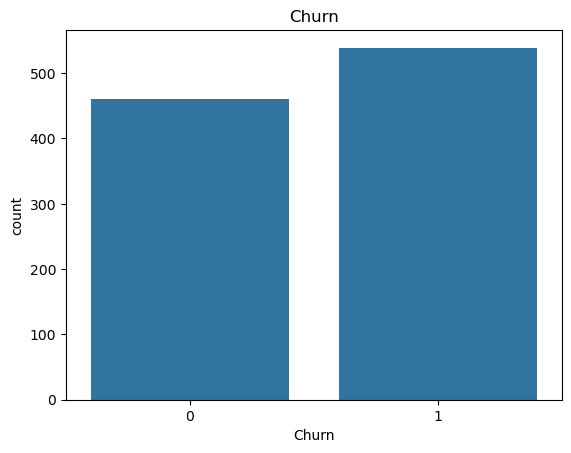

In [5]:
sns.countplot(x=df["Churn"])
plt.title("Churn")

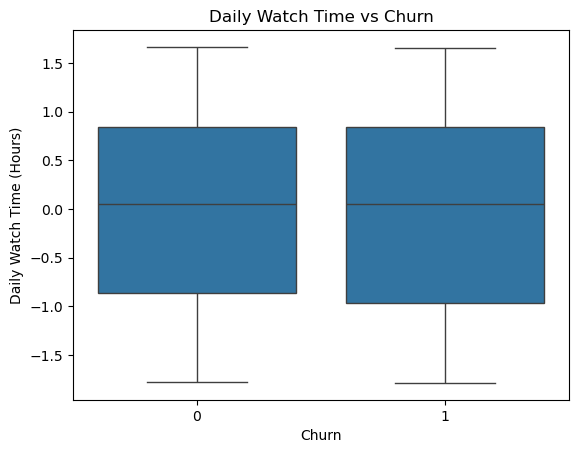

In [6]:
#Watch time vs churn
sns.boxplot(x="Churn", y="Daily Watch Time (Hours)", data=df)
plt.title("Daily Watch Time vs Churn")
plt.show()

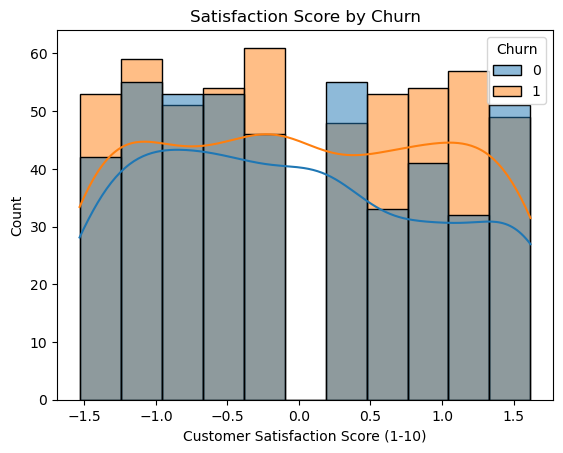

In [7]:
#Satisfaction score vs churn
sns.histplot(data=df, x="Customer Satisfaction Score (1-10)", hue="Churn", kde=True)
plt.title("Satisfaction Score by Churn")
plt.show()

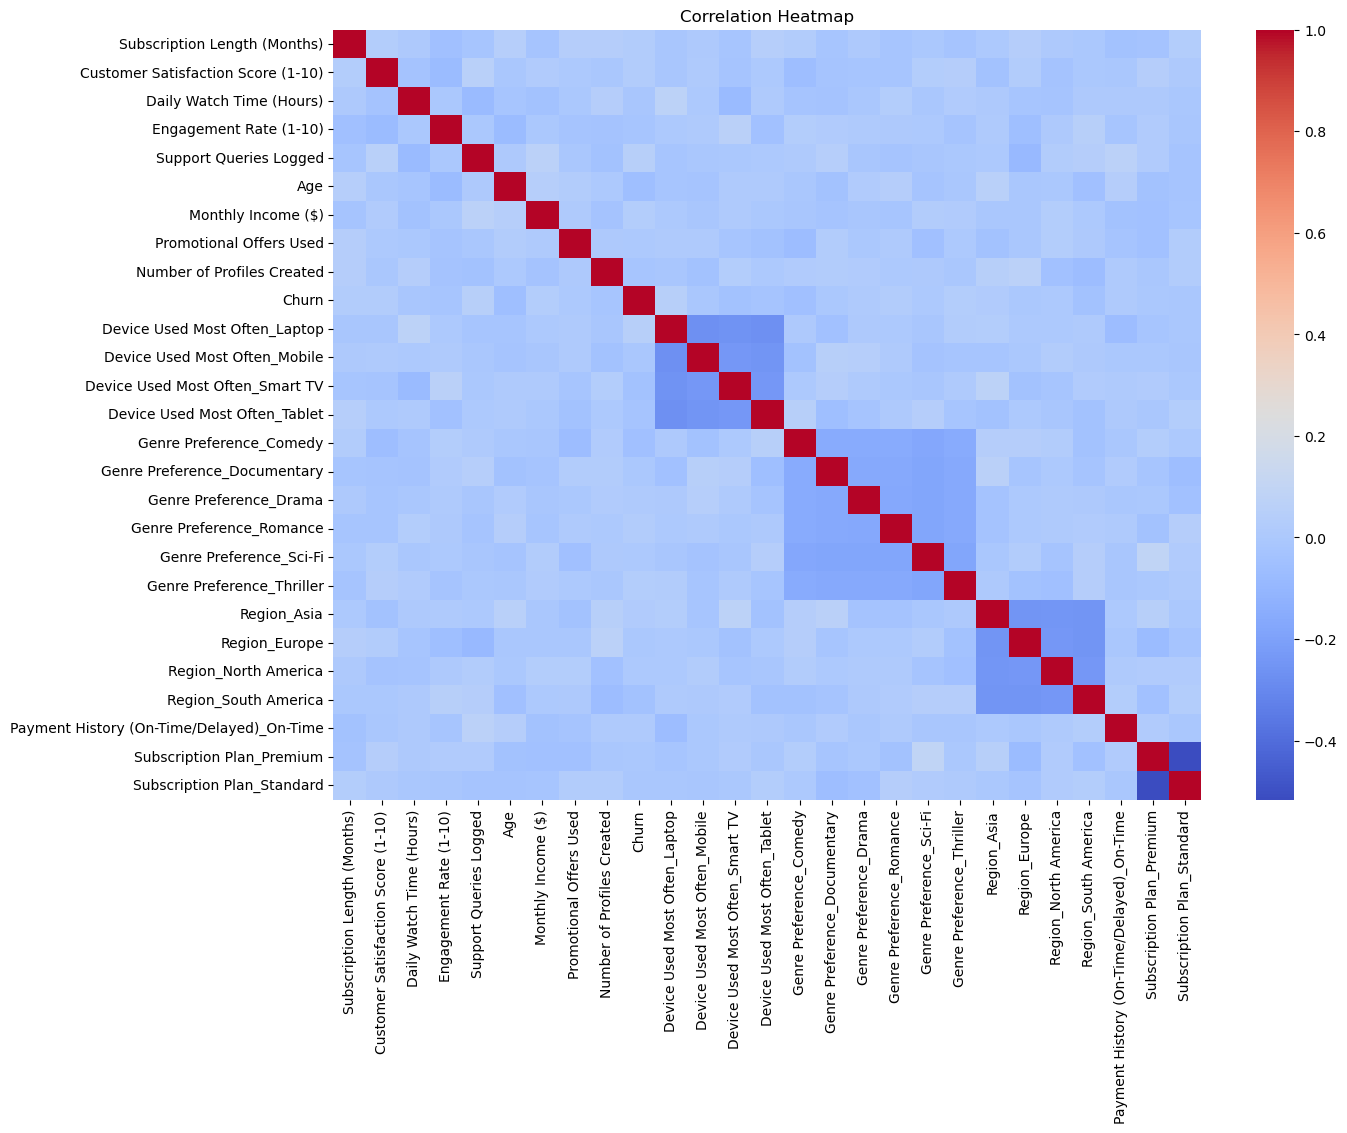

In [8]:
#Correlation heatmap 
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

X = df.drop("Churn", axis=1)
Y = df["Churn"]

#80/20 split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

#Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, Y_train)

#Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(32,16), max_iter=1500)
nn_model.fit(X_train, Y_train)

,hidden_layer_sizes,"(32, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1500
,shuffle,True
,random_state,None


In [10]:
from sklearn.metrics import classifiaction_report, confusion_matrix

#Logistic Regression
pred_log = log_model.predict(X_test)
print("LOGISTIC REGRESSION REPORT:\n")
print(classification_report(y_test, pred_log))

sns.heatmap(confusion_matrix(y_test, pred_log), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

#Neural Network
pred_nn = nn_model.predict(X_test)
print("NEURAL NETWORK REPORT:\n")
print(classification_report(y_test, pred_nn))

sns.heatmap(confusion_matrix(y_test, pred_nn, annot=True, fmt='d'))
plt.title("Neural Network Confusion Matrix")
plt.show()

ImportError: cannot import name 'classifiaction_report' from 'sklearn.metrics' (C:\Users\etc\New folder\Lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
print("Logistic Regression Accuracy:", log_model.score(X_test, y_test))
print("Neural Network Accuracy:", nn_model.score(X_test, y_test))

print("\nChoose the model with the best recall on Churn = 1 (predicting people who will leave).")